In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.metrics import confusion_matrix


In [4]:
# 데이터 불러오기
wine = pd.read_csv('Datas/wine.csv')


FileNotFoundError: [Errno 2] No such file or directory: 'Datas/wine.csv'

In [ ]:
#데이터 확인
wine
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


<AxesSubplot:ylabel='Frequency'>

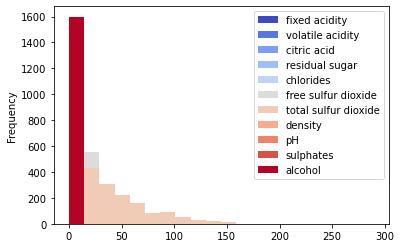

In [ ]:
# 탐색적 데이터 분석
wine.plot(kind='hist', bins=20, cmap='coolwarm')

In [ ]:
# 데이터 전처리(결측치, 인코딩, 스케일링)
wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
# 데이터 인코딩
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
encoder.fit(wine.alcohol)
labels = encoder.transform(wine.alcohol)

In [ ]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   object 
dtypes: float64(11), object(1)
memory usage: 150.0+ KB


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(wine)
scaled = scaler.transform(wine)

ValueError: could not convert string to float: 'bad'

In [ ]:
scaled[:, 0].std()

NameError: name 'scaled' is not defined

In [ ]:
x_df = wine.drop('alcohol', axis =1)
y_df = wine.alcohol

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=12)

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=12)

<AxesSubplot:>

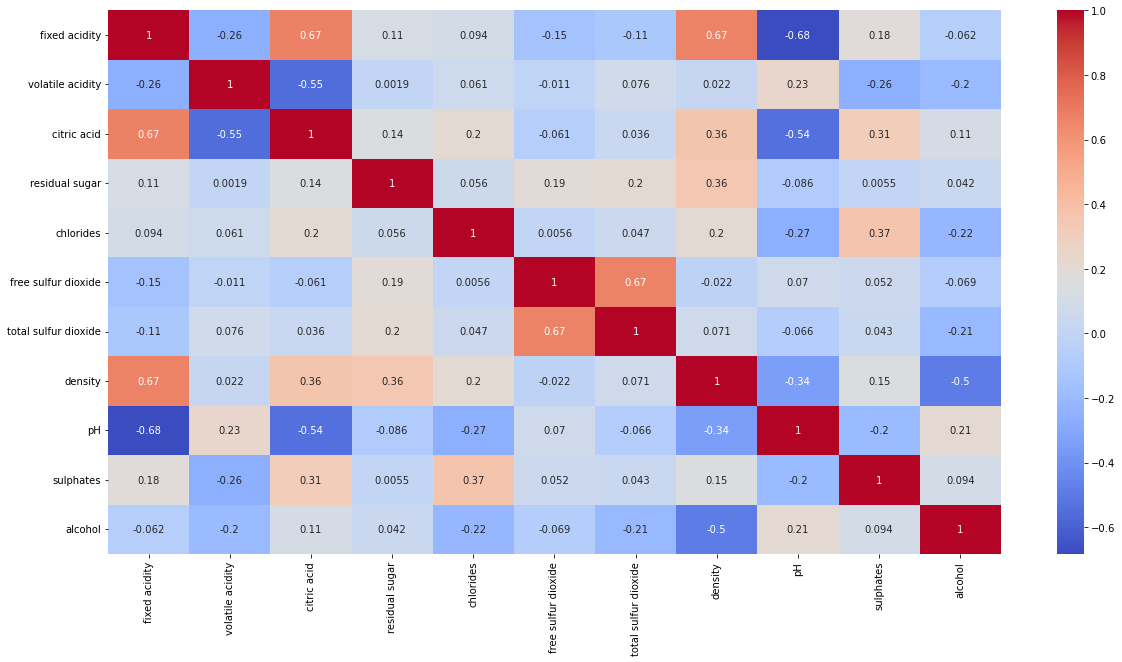

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(wine.corr(), annot=True, cmap='coolwarm')


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [ ]:
dt_clf = DecisionTreeClassifier()
rf_clf = RandomForestClassifier()
lr_clf = LogisticRegression()


In [ ]:
dt_clf.fit(x_train, y_train)
rf_clf.fit(x_train, y_train)
lr_clf.fit(x_train, y_train)

ValueError: could not convert string to float: 'good'

In [ ]:
dt_pred = dt_clf.predict(x_test)
rf_pred = rf_clf.predict(x_test)
lr_pred = lr_clf.predict(x_test)


NotFittedError: This DecisionTreeClassifier instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [ ]:
from sklearn.metrics import accuracy_score


In [ ]:
# 교차검증
def exec_kfold(clf, folds=5):
    kfold = sklearn.model_selection.KFold(n_splits=folds)
    scores = []

    for iter_count, (train_index, test_index), in enumerate(kfold.split(x_df)):
        x_train, x_test = x_df.values[train_index], x_df.values[test_index]
        y_train, y_test = y_df.values[train_index], y_df.values[test_index]

        clf.fit(x_train,  y_train)
        predictions = clf.predict(x_test)
        accuracy = accuracy_score(y_test, predictions)
        scores.append(accuracy)
        print('kfold {0} accuaracy score: {1:.4f]'.format(iter_count, accuracy))

    mean_score = np.mean(scores)
    print('mean accuracy score: {0:.4f}'.format(mean_score))


In [ ]:
exec_kfold(dt_clf)
exec_kfold(rf_clf)
exec_kfold(lr_clf)
wine.pH.value_counts()[0] / len(wine)

ValueError: could not convert string to float: 'good'

In [ ]:
skf = sklearn.model_selection.StratifiedKFold(n_splits=5)
num = 0

for train_index, test_index in skf.split(wine, wine.pH):
    num += 1 
    label_train = wine.pH.iloc[train_index]
    label_test = wine.pH.iloc[test_index]
    

In [ ]:
for i in [dt_clf, rf_clf, lr_clf]:
      scores = sklearn.model_selection.cross_val_score(i, x_df, y_df, cv=5)
  
  for iter_count, accuracy in enumerate(scores):
    print("stratified kfold {0} accuracy score: {1:.4f}".format(iter_count, accuracy))
  print("average score: {0:.4f}".format(np.mean(scores)))

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 4)

In [ ]:
DecisionTreeClassifier()

NameError: name 'DecisionTreeClassifier' is not defined

In [ ]:
grid = sklearn.model_selection.GridSearchCV(dt_clf, param_grid=parameters, 
                                            scoring='accuracy', cv=5, n_jobs=1)


NameError: name 'sklearn' is not defined

In [ ]:
grid.fit(x_train, y_train)
grid.best_params_
grid.best_score_
best_dtclf = grid.best_estimator_
bets_predictions = best_dtclf.predict(x_test)
accuracy_score(y_test, bets_predictions)
exec_kfold(best_dtclf)
exec_kfold(dt_clf)



NameError: name 'grid' is not defined

In [ ]:
from sklearn.metrics import confusion_matrix

In [ ]:
pd.DataFrame(confusion_matrix(y_test, best_predictions), columns=['0','1'])

NameError: name 'y_test' is not defined

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, accuracy_score

In [ ]:
def clf_eval(y_test, pred):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    auc = roc_auc_score(y_test, pred)

  print('------ Confusion Matrix ------')
  print(confusion)
  print('''정확도:{0:.4f}, 정밀도:{1:.4f}, 재현율:{2:.4f}, F1:{3:.4f},
  AUC:{4:.4f}'''.format(accuracy, precision, recall, f1, auc))